In [4]:
# !python -m pip install --upgrade pymupdf
import fitz

In [6]:
filepath = r'REP-EDC-2020_Fusion_Final-1-5.pdf'

In [7]:
##
# Get the entire file as string
##
text = ''
with fitz.open(filepath) as doc:
    for page in doc:
        text += page.get_text()

In [35]:
##
# Get the entire file as string
##
text_dict = []
with fitz.open(filepath) as doc:
    for page in doc:
        text_dict.append(page.get_text("dict", sort=False))

In [36]:
type(text_dict)

list

In [38]:
text_dict

[{'width': 612.0,
  'height': 792.0,
  'blocks': [{'number': 0,
    'type': 0,
    'bbox': (71.99996948242188,
     36.033119201660156,
     559.9302368164062,
     54.59596252441406),
    'lines': [{'spans': [{'size': 11.029430389404297,
        'flags': 4,
        'font': 'Impact',
        'color': 0,
        'ascender': 1.0087890625,
        'descender': -0.2109375,
        'text': ' ',
        'origin': (71.99996948242188, 51.12030029296875),
        'bbox': (71.99996948242188,
         39.983272552490234,
         73.9422607421875,
         53.44905090332031)}],
      'wmode': 0,
      'dir': (1.0, 0.0),
      'bbox': (71.99996948242188,
       39.983272552490234,
       73.9422607421875,
       53.44905090332031)},
     {'spans': [{'size': 11.029430389404297,
        'flags': 4,
        'font': 'Impact',
        'color': 0,
        'ascender': 1.0087890625,
        'descender': -0.2109375,
        'text': '           ',
        'origin': (167.39698791503906, 51.12030029296875),
 

In [9]:
print(text[0:700])

 
           Entreprises donatrices et commanditaires du Québec 
 
 
 
 
    « DDD » : Date de distribution des dons. « FAF » : date de fin d'année fiscale.  « Langue : B »  dans l’inscription d’une fondation indique que vous pouvez écrire en français ou en anglais. 
 
Tous droits réservés © 2020– Centre québécois de philanthropie 
1
 
 
 
 
 
 
 
 
 
 
 
 
 
 
1    3M Canada inc.  
7290, rue Frederick Banting  
Saint-Laurent QC  H4T1Z2   
Secteur industriel : Équipement et services industriels; Fabrication 
de peintures, de revêtements et de rubans adhésifs, abrasifs, 
produits de soins de santé et télécommunications.   
Langue de comm.: Français 
DDD(1) : En tout temps  FAF : 31 décembre 



In [6]:
##
# Get blocks instead, allows for list ordering
##
blocks = [] #have to use a list
with fitz.open(filepath) as doc:
    for page in doc:
        blocks += page.get_text("blocks")

In [7]:
print(type(blocks))
print(len(blocks))

<class 'list'>
163


In [8]:
blocks[:5]

[(71.99996948242188,
  36.033119201660156,
  559.9302368164062,
  54.59596252441406,
  ' \n           Entreprises donatrices et commanditaires du Québec \n \n \n \n \n',
  0,
  0),
 (53.999977111816406,
  730.2886352539062,
  559.5663452148438,
  738.2749633789062,
  "    « DDD » : Date de distribution des dons. « FAF » : date de fin d'année fiscale.  « Langue : B »  dans l’inscription d’une fondation indique que vous pouvez écrire en français ou en anglais. \n \n",
  1,
  0),
 (200.39991760253906,
  741.0960083007812,
  431.97698974609375,
  751.5,
  'Tous droits réservés © 2020– Centre québécois de philanthropie \n',
  2,
  0),
 (569.8797607421875,
  35.822723388671875,
  576.0062255859375,
  48.60703659057617,
  '1\n',
  3,
  0),
 (53.999977111816406,
  71.72286987304688,
  170.01712036132812,
  186.6115264892578,
  ' \n \n \n \n \n \n \n \n \n \n \n \n \n \n1    3M Canada inc.  \n7290, rue Frederick Banting  \nSaint-Laurent QC  H4T1Z2   \n',
  4,
  0)]

The first four elements in the nested tuple are the float coordinates of the box. The last two are the box type and box number (not sure of order yet, documentation says element 6 is block type and 7 block number but seems to be opposite

Blocks 3,4,5,6,7 correspond to the start of the first entry in the pdf.

In [9]:
blocks[3][4]

'1\n'

In [10]:
blocks[4][4]

' \n \n \n \n \n \n \n \n \n \n \n \n \n \n1    3M Canada inc.  \n7290, rue Frederick Banting  \nSaint-Laurent QC  H4T1Z2   \n'

In [11]:
blocks[5][4]

'Secteur industriel : Équipement et services industriels; Fabrication \nde peintures, de revêtements et de rubans adhésifs, abrasifs, \nproduits de soins de santé et télécommunications.   \nLangue de comm.: Français \nDDD(1) : En tout temps  FAF : 31 décembre \n'

In [12]:
blocks[6][4]

'N° de tél./Cie: 514-336-5252    \n2e n° de tél.: 800-265-1840 \nSite Web : https://www.3mcanada.ca/  \n'

In [13]:
blocks[7][4]

"Domaine d'intérêt : Éducation, environnement, santé et  bien-être \nseulement.  \nLimites géog.: régionales.  \n"

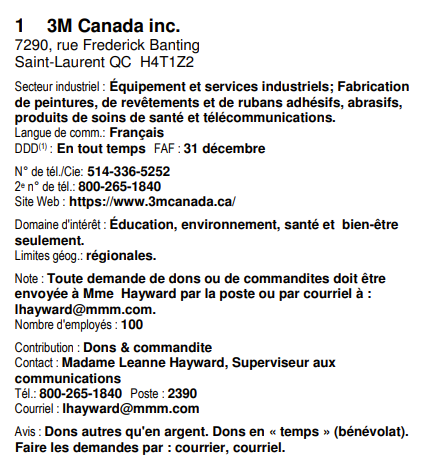


In [14]:
for i, b in enumerate(blocks[:20]):
    print(str(i) + " :::: " + repr(b[4]))

0 :::: ' \n           Entreprises donatrices et commanditaires du Québec \n \n \n \n \n'
1 :::: "    « DDD » : Date de distribution des dons. « FAF » : date de fin d'année fiscale.  « Langue : B »  dans l’inscription d’une fondation indique que vous pouvez écrire en français ou en anglais. \n \n"
2 :::: 'Tous droits réservés © 2020– Centre québécois de philanthropie \n'
3 :::: '1\n'
4 :::: ' \n \n \n \n \n \n \n \n \n \n \n \n \n \n1    3M Canada inc.  \n7290, rue Frederick Banting  \nSaint-Laurent QC  H4T1Z2   \n'
5 :::: 'Secteur industriel : Équipement et services industriels; Fabrication \nde peintures, de revêtements et de rubans adhésifs, abrasifs, \nproduits de soins de santé et télécommunications.   \nLangue de comm.: Français \nDDD(1) : En tout temps  FAF : 31 décembre \n'
6 :::: 'N° de tél./Cie: 514-336-5252    \n2e n° de tél.: 800-265-1840 \nSite Web : https://www.3mcanada.ca/  \n'
7 :::: "Domaine d'intérêt : Éducation, environnement, santé et  bien-être \nseulement.  \nLimit

The blocks are NOT well made. Entry #2 starts in the same block as the end of entry #1 (block 10).

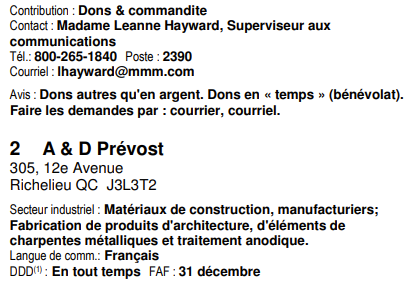

It does seem that every new entry starts with string "\n \n \nX    " (4 spaces) where X is the number of the entry, however. Use that to separate?

In [15]:
text[:500]

" \n           Entreprises donatrices et commanditaires du Québec \n \n \n \n \n    « DDD » : Date de distribution des dons. « FAF » : date de fin d'année fiscale.  « Langue : B »  dans l’inscription d’une fondation indique que vous pouvez écrire en français ou en anglais. \n \nTous droits réservés © 2020– Centre québécois de philanthropie \n1\n \n \n \n \n \n \n \n \n \n \n \n \n \n \n1    3M Canada inc.  \n7290, rue Frederick Banting  \nSaint-Laurent QC  H4T1Z2   \nSecteur industriel : Équipement et services industriels;"

In [16]:
text[-10000:]

" \nLimites géog.: régionales.  \nNombre d'employés : 100 \nContribution : Dons & commandite \nContact : Madame Élise Ferlatte, Coordonnatrice de services  \nTél.: 866-888-2685    \nCourriel : elise.ferlatte@adecco.qc.ca  \nAvis : Dons autres qu'en argent. Faire les demandes par : \ncourrier, courriel. L'entreprise possède une liste d'org. \n« privilégiés ». \n \n \n15    ADF inc., Groupe \n300, rue Henry-Bessemer  \nTerrebonne  QC  J6Y1T3   \nSecteur industriel : Construction et ingénierie; Conception, \ningénierie, fabrication et installation sélective de charpentes \nmétalliques complexes pour le secteur de la construction non \nrésidentielle.  Langue de comm.: Français \nDDD(1) : En tout temps  FAF : 31 décembre \nN° de tél./Cie: 450-965-1911   N° de fax/Cie: 450-965-8558 \n2e n° de tél.: 800-263-7560 \nSite Web : https://www.adfgroup.com  \nDomaine d'intérêt : Santé, Enfants et jeunesse, Sport  amateur.  \nLimites géog.: nationales.  \nNote : Pour une demande de dons, sélectionner

In [17]:
#With the whole text:
split_text = text.split(" \n \n \n1    ") #Splitting without the 4 end spaces creates 16 elements, this creates 2
#But hyper specific to particular format of this document
len(split_text)

2

In [18]:
split_text[0]

" \n           Entreprises donatrices et commanditaires du Québec \n \n \n \n \n    « DDD » : Date de distribution des dons. « FAF » : date de fin d'année fiscale.  « Langue : B »  dans l’inscription d’une fondation indique que vous pouvez écrire en français ou en anglais. \n \nTous droits réservés © 2020– Centre québécois de philanthropie \n1\n \n \n \n \n \n \n \n \n \n \n \n"

In [19]:
split_text[1][:100]

'3M Canada inc.  \n7290, rue Frederick Banting  \nSaint-Laurent QC  H4T1Z2   \nSecteur industriel : Équi'

In [20]:
#Try with n2
split_text = text.split(" \n \n \n2    ")
print(len(split_text))

#Try with n3
split_text = text.split(" \n \n \n3    ")
print(len(split_text))

2
2


In [21]:
split_text[0][-100:]

'chitectural.com   \nAvis : Faire les demandes par : courrier. \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n'

In [22]:
split_text[1][:100]

"AAR Aicraft - Services Trois-Rivières  \n3750, chemin de l'aéroport  \nTrois-Rivières  QC  G9B2N8   \nS"

This method has a problem with overlap of lists: can solve by subtracting difference in lengths of string?

In [23]:
split_text_1 = text.split(" \n \n \n1    ")
split_text_2 = text.split(" \n \n \n2    ")
split_text_3 = text.split(" \n \n \n3    ")
split_text_4 = text.split(" \n \n \n4    ")

In [24]:
print(len(split_text_1[0]))
print(len(split_text_2[0]))
print(len(split_text_3[0]))

358
1345
2303


In [25]:
useless_text = split_text_1[0]
org1 = split_text_2[0][len(split_text_1[0]):]
org2 = split_text_3[0][len(split_text_2[0]):]
org3 = split_text_4[0][len(split_text_3[0]):]

In [26]:
org1

" \n \n \n1    3M Canada inc.  \n7290, rue Frederick Banting  \nSaint-Laurent QC  H4T1Z2   \nSecteur industriel : Équipement et services industriels; Fabrication \nde peintures, de revêtements et de rubans adhésifs, abrasifs, \nproduits de soins de santé et télécommunications.   \nLangue de comm.: Français \nDDD(1) : En tout temps  FAF : 31 décembre \nN° de tél./Cie: 514-336-5252    \n2e n° de tél.: 800-265-1840 \nSite Web : https://www.3mcanada.ca/  \nDomaine d'intérêt : Éducation, environnement, santé et  bien-être \nseulement.  \nLimites géog.: régionales.  \nNote : Toute demande de dons ou de commandites doit être \nenvoyée à Mme  Hayward par la poste ou par courriel à : \nlhayward@mmm.com. \nNombre d'employés : 100 \nContribution : Dons & commandite \nContact : Madame Leanne Hayward, Superviseur aux \ncommunications  \nTél.: 800-265-1840  Poste : 2390    \nCourriel : lhayward@mmm.com  \nAvis : Dons autres qu'en argent. Dons en « temps » (bénévolat). \nFaire les demandes par : cour

In [27]:
org2

" \n \n \n2    A & D Prévost  \n305, 12e Avenue  \nRichelieu QC  J3L3T2   \nSecteur industriel : Matériaux de construction, manufacturiers; \nFabrication de produits d'architecture, d'éléments de \ncharpentes métalliques et traitement anodique.  \nLangue de comm.: Français \nDDD(1) : En tout temps  FAF : 31 décembre \nN° de tél./Cie: 450-658-8771   N° de fax/Cie: 450-658-0077 \n2e n° de tél.: 800-361-4433 \nCourriel / Cie :  info@prevost-architectural.com  \nSite Web : www.adprevost.ca  \nDomaine d'intérêt : Cancer, hôpitaux, maladies du coeur et  santé.  \nLimites géog.: locales.  \nNombre d'employés : 200 \nContribution : Dons \nContact : Monsieur Claude Cardin, Président   \nTél.: 450-658-8771  Fax : 450-658-0077   \n2e contact pour : Dons  \nMadame Marie-Josée Dery, Coordonnatrice Capital Humain \nTél.: 450-658-8771  Fax : 450-658-0077  \nCourriel : mjdery@prevost-architectural.com   \nAvis : Faire les demandes par : courrier. \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \

In [28]:
org3

" \n \n \n3    AAR Aicraft - Services Trois-Rivières  \n3750, chemin de l'aéroport  \nTrois-Rivières  QC  G9B2N8   \nSecteur industriel : Offre des services d'entretien, de réparation et \nde révision (MRO) d'aéronefs.  Langue de comm.: Français \nDDD(1) : En tout temps  FAF : 31 décembre \nN° de tél./Cie: 819-377-4500   N° de fax/Cie: 819- 668-8811 \nCourriel / Cie : comptabilite@aarcorp.com  \nSite Web : https://www.aarcorp.com  \nDomaine d'intérêt : Éducation, Santé, Bien-être, Vétérans.  \nLimites géog.: nationales.  \nNote : Envoyer votre demande de dons par  courriel à  \nMme Vautour, Adjoint au V.P. des opérations à :  \nelizabeth.vautour@aarcorp.com. \nNombre d'employés : 340 \nContribution : Dons \nContact : Madame Elizabeth Vautour, Adjointe exécutive au vice-\nprésident des opérations  \nTél.: 819-377-4500  Poste : 3201    \nCourriel : elizabeth.vautour@aarcorp.com  \nAvis : Faire les demandes par : courriel."

Seems to work, can try doing this with a loop. Probably exceedingly inefficient lol

In [29]:
num_orgs = 23
all_splits = []

for i in range(1, num_orgs+1):
    
    if i > num_orgs:
        break
        
    temp_split_1 = text.split(f" \n \n \n{i}    ")
    temp_split_2 = text.split(f" \n \n \n{i+1}    ")
    
    all_splits.append(temp_split_2[0][len(temp_split_1[0]) + len(f" \n \n \n{i}    "):])

In [30]:
all_splits[0]

"3M Canada inc.  \n7290, rue Frederick Banting  \nSaint-Laurent QC  H4T1Z2   \nSecteur industriel : Équipement et services industriels; Fabrication \nde peintures, de revêtements et de rubans adhésifs, abrasifs, \nproduits de soins de santé et télécommunications.   \nLangue de comm.: Français \nDDD(1) : En tout temps  FAF : 31 décembre \nN° de tél./Cie: 514-336-5252    \n2e n° de tél.: 800-265-1840 \nSite Web : https://www.3mcanada.ca/  \nDomaine d'intérêt : Éducation, environnement, santé et  bien-être \nseulement.  \nLimites géog.: régionales.  \nNote : Toute demande de dons ou de commandites doit être \nenvoyée à Mme  Hayward par la poste ou par courriel à : \nlhayward@mmm.com. \nNombre d'employés : 100 \nContribution : Dons & commandite \nContact : Madame Leanne Hayward, Superviseur aux \ncommunications  \nTél.: 800-265-1840  Poste : 2390    \nCourriel : lhayward@mmm.com  \nAvis : Dons autres qu'en argent. Dons en « temps » (bénévolat). \nFaire les demandes par : courrier, courriel

In [31]:
all_splits[-1]

"Aéroports de Montréal  \n800, pl. Leigh-Capreol, bur. 1000  \nDorval QC  H4Y0A5   \nNbre de succ.: 1  Filiale de : Aéroports de Montréal Capital  \nSecteur industriel : Services publics; Administration \ngouvernementale. Gestion aéroportuaire. Transport et \nentreposage.  Langue de comm.: Français \nDDD(1) : En tout temps  FAF : 31 décembre \nN° de tél./Cie: 514-394-7200   N° de fax/Cie: 514-394-7356 \n2e n° de tél.: 800-465-1213 \nCourriel / Cie : affaires.publiques@admtl.com  \nSite Web : www.admtl.com  \nDomaine d'intérêt : Environnement, organismes  communautaires.  \nLimites géog.: régionales.  \nNombre d'employés : 625 \nContribution : Dons & commandite \nContact : Monsieur Martin Massé, Vice-président Affaires \npubliques et Communications  \nTél.: 514-394-7200  Fax : 514-394-7356  \nCourriel : affaires.publiques@admtl.com  \nAvis : Faire les demandes par : courrier, courriel, fax. \n \n \n"

In [32]:
all_splits[3]

"ABB (Albert Bob Bob)  \n(anc. Baldor Electric Canada Inc.)  \n800 boul. Hymes  \nSaint-Laurent QC  H4S0B5   \nFiliale de : Baldor-Dodge-Reliance  \nSecteur industriel : Équipement et services industriels; Fabriquer \ndes poulies, bagues, poulies et roues dentées synchrones, \npoulies étagées et accouplements élastomères de la plus haute \nqualité possible dans le marché.  Langue de comm.: Français \nDDD(1) : En tout temps  \nN° de tél./Cie: 514-856-6222   N° de fax/Cie: 514-856-6297 \nSite Web : http://new.abb.com/ca  \nDomaine d'intérêt : Jeunesse (local seulement).  \nLimites géog.: locales.  \nNote : Toute demande de dons ou de commandites doit être \nenvoyée par  courrier ou par télécopieur et  adressez votre \ndemande au  responsable des don ou des  commandites. \nNombre d'employés : 160 \nContribution : Dons & commandite \nContact : Madame Carley Tietolman, Responsable des dons et \ncommandites  \nTél.: 514-856-6222  Fax : 514-856-6297   \nAvis : Faire les demandes par : courrie

In [33]:
all_splits[4]

''

In [34]:
all_splits[5]

"AbbVie  \n8401, rte Transcanadienne  \nSaint-Laurent Québec  H4S1Z1   \nSecteur industriel : Produits pharmaceutiques et biotechnologiques; \nAbbVie est une entreprise américaine spécialisée dans la  \nrecherche pharmaceutique. Langue de comm.: Anglais  \nN° de tél./Cie: 514-906-9700   N° de fax/Cie: 888-704-8266 \n2e n° de tél.: 888-703-3006 \nSite Web : http://www.abbvie.ca/fr/index.html  \nDomaine d'intérêt : Maladies tropicales, négligées et  dangereuses, \néducation, animaux.   \nNote : The AbbVie Foundation, a non-profit charitable \norganization, supports advancing progress against NTDs with  \nits $3 million combined commitment. \nContribution : Dons \nContact : Monsieur Stéphane Lassignardie, Directeur général   \nTél.: 888-779-0333     \nAvis : Faire les demandes par : courrier. \n \nL'entreprise possède une fondation corporative :  \n \nAbbVie, Fondation \n8401, rte Trans-Canadienne \nSaint-Laurent QC H4S1Z1 \nLangue : F Catégorie : Fondation corporaative \nContact : Direct

In [35]:
all_splits[7]

"ACCEO Solutions  \n75, rue Queen, bur. 6100  \nMontréal QC  H3C2N6   \nNbre de succ.: 7  Princip. filiale(s) :  Conceptum Inc., GFI Conseil Inc., \nGFI Solutions d'affaires inc., Accovia Inc., etc.  \nSecteur industriel : Informatique et logiciels; Spécialiste des \néchanges d'affaires électroniques; chef de file en matière de \nsolutions d'affaires, comptables et bancaires, d'infonuagique et \nde monétique. Services-conseils spécialisés dont \nl'accompagnement stratégique, l'infrastructure et la gestion.  \nLangue de comm.: Français \nDDD(1) : En tout temps  FAF : 31 décembre \nN° de tél./Cie: 514-288-7161   N° de fax/Cie: 514-868-5334 \n2e n° de tél.:  800-471-7161 \nCourriel / Cie : info@acceo.com  \nSite Web : http://www.acceo.com/  \nDomaine d'intérêt : Se concentre sur les organismes  humanitaires, \nFondation québécoise  du cancer du sein, Fondation Hôpital  \npour enfants de Montréal, Fondation  Dr Julien, Fondation pour \nla  promotion de la pédiatrie sociale.  \nLimites géog

In [36]:
all_splits[8]

''

In [37]:
all_splits[9]

"Acier AGF  \n2270, rue Garneau  \nLongueuil QC  J4G1E7   \nNbre de succ.: 9    \nSecteur industriel : Produits d'acier et de métal; Concepteur et \nfabricant d'acier d'armature, précontrainte par post-tension et \ntreillis métallique, échafaudage.  Langue de comm.: Français \nDDD(1) : En tout temps  \nN° de tél./Cie: 450-442-9494   N° de fax/Cie: 450-442-0538 \n2e n° de tél.: 1-877-404-9494 \nSite Web : www.acieragf.com  \nDomaine d'intérêt : Éducation, Santé, arts et culture, loisirs et \nsports, engagement socio- humanitaire.  \nLimites géog.: locales et régionales. \nNote : Site web, voir bas de page Fondation, Formulaire \ndisponible. \nNombre d'employés : 750 \nContribution : Dons & commandite \nContact : Madame Catherine Gendron, Directeure   \nTél.: 450-442-9494  Poste : 2385  Fax : 450-442-0538  \nCourriel : catherine.gendron@agfgroup.com  \nAvis : Faire les demandes par : courrier, courriel, fax."

### Problem: orgs at the beginning of a page don't get separated correctly

In [38]:
split_text_3 = text.split(" \n \n \n3    ")
split_text_4 = text.split(" \n \n \n4    ")
split_text_5 = text.split(" \n \n \n5    ")
split_text_6 = text.split(" \n \n \n6    ")

In [39]:
print(len(split_text_3[0]))
print(len(split_text_4[0]))
print(len(split_text_5[0]))
print(len(split_text_3))
print(len(split_text_4))
print(len(split_text_5))

2303
3212
25251
2
2
1


In [40]:
text

" \n           Entreprises donatrices et commanditaires du Québec \n \n \n \n \n    « DDD » : Date de distribution des dons. « FAF » : date de fin d'année fiscale.  « Langue : B »  dans l’inscription d’une fondation indique que vous pouvez écrire en français ou en anglais. \n \nTous droits réservés © 2020– Centre québécois de philanthropie \n1\n \n \n \n \n \n \n \n \n \n \n \n \n \n \n1    3M Canada inc.  \n7290, rue Frederick Banting  \nSaint-Laurent QC  H4T1Z2   \nSecteur industriel : Équipement et services industriels; Fabrication \nde peintures, de revêtements et de rubans adhésifs, abrasifs, \nproduits de soins de santé et télécommunications.   \nLangue de comm.: Français \nDDD(1) : En tout temps  FAF : 31 décembre \nN° de tél./Cie: 514-336-5252    \n2e n° de tél.: 800-265-1840 \nSite Web : https://www.3mcanada.ca/  \nDomaine d'intérêt : Éducation, environnement, santé et  bien-être \nseulement.  \nLimites géog.: régionales.  \nNote : Toute demande de dons ou de commandites doit 

In [41]:
split_text_5[0]

" \n           Entreprises donatrices et commanditaires du Québec \n \n \n \n \n    « DDD » : Date de distribution des dons. « FAF » : date de fin d'année fiscale.  « Langue : B »  dans l’inscription d’une fondation indique que vous pouvez écrire en français ou en anglais. \n \nTous droits réservés © 2020– Centre québécois de philanthropie \n1\n \n \n \n \n \n \n \n \n \n \n \n \n \n \n1    3M Canada inc.  \n7290, rue Frederick Banting  \nSaint-Laurent QC  H4T1Z2   \nSecteur industriel : Équipement et services industriels; Fabrication \nde peintures, de revêtements et de rubans adhésifs, abrasifs, \nproduits de soins de santé et télécommunications.   \nLangue de comm.: Français \nDDD(1) : En tout temps  FAF : 31 décembre \nN° de tél./Cie: 514-336-5252    \n2e n° de tél.: 800-265-1840 \nSite Web : https://www.3mcanada.ca/  \nDomaine d'intérêt : Éducation, environnement, santé et  bien-être \nseulement.  \nLimites géog.: régionales.  \nNote : Toute demande de dons ou de commandites doit 

In [42]:
#split_text_5[1] 
#list index out of range

IndexError: list index out of range

In [43]:
split_text_6[0]

" \n           Entreprises donatrices et commanditaires du Québec \n \n \n \n \n    « DDD » : Date de distribution des dons. « FAF » : date de fin d'année fiscale.  « Langue : B »  dans l’inscription d’une fondation indique que vous pouvez écrire en français ou en anglais. \n \nTous droits réservés © 2020– Centre québécois de philanthropie \n1\n \n \n \n \n \n \n \n \n \n \n \n \n \n \n1    3M Canada inc.  \n7290, rue Frederick Banting  \nSaint-Laurent QC  H4T1Z2   \nSecteur industriel : Équipement et services industriels; Fabrication \nde peintures, de revêtements et de rubans adhésifs, abrasifs, \nproduits de soins de santé et télécommunications.   \nLangue de comm.: Français \nDDD(1) : En tout temps  FAF : 31 décembre \nN° de tél./Cie: 514-336-5252    \n2e n° de tél.: 800-265-1840 \nSite Web : https://www.3mcanada.ca/  \nDomaine d'intérêt : Éducation, environnement, santé et  bien-être \nseulement.  \nLimites géog.: régionales.  \nNote : Toute demande de dons ou de commandites doit 

In [44]:
split_text_6[1]

"AbbVie  \n8401, rte Transcanadienne  \nSaint-Laurent Québec  H4S1Z1   \nSecteur industriel : Produits pharmaceutiques et biotechnologiques; \nAbbVie est une entreprise américaine spécialisée dans la  \nrecherche pharmaceutique. Langue de comm.: Anglais  \nN° de tél./Cie: 514-906-9700   N° de fax/Cie: 888-704-8266 \n2e n° de tél.: 888-703-3006 \nSite Web : http://www.abbvie.ca/fr/index.html  \nDomaine d'intérêt : Maladies tropicales, négligées et  dangereuses, \néducation, animaux.   \nNote : The AbbVie Foundation, a non-profit charitable \norganization, supports advancing progress against NTDs with  \nits $3 million combined commitment. \nContribution : Dons \nContact : Monsieur Stéphane Lassignardie, Directeur général   \nTél.: 888-779-0333     \nAvis : Faire les demandes par : courrier. \n \nL'entreprise possède une fondation corporative :  \n \nAbbVie, Fondation \n8401, rte Trans-Canadienne \nSaint-Laurent QC H4S1Z1 \nLangue : F Catégorie : Fondation corporaative \nContact : Direct

Problem happens because orgs at start of new page follow format \nx\ny where x is page and y is org number

Possible solution: check length of split list, if == 1 then drop the split and try using the format above

In [45]:
#Possible solution: 

num_orgs = 23
num_pages = 5
all_splits_v2 = []

for i in range(1, num_orgs+1):
    
    if i > num_orgs:
        break
        
    temp_split_1 = text.split(f" \n \n \n{i}    ")
    temp_split_2 = text.split(f" \n \n \n{i+1}    ")
    
    if len(temp_split_2) == 1:
        
        for j in range(1, num_pages+1):
            if len(text.split(f"\n{j}\n{i}")) == 2:
                temp_split_2 = text.split(f"\n{j}\n{i}")
    
    if len(temp_split_1) == 1:
        
        for j in range(1, num_pages+1):
            if len(text.split(f"\n{j}\n{i}")) == 2:
                temp_split_1 = text.split(f"\n{j}\n{i}")
            
    all_splits_v2.append(temp_split_2[0][len(temp_split_1[0]) + len(f" \n \n \n{i}    "):])

In [46]:
len(all_splits_v2)

23

In [47]:
all_splits_v2[3]

"ABB (Albert Bob Bob)  \n(anc. Baldor Electric Canada Inc.)  \n800 boul. Hymes  \nSaint-Laurent QC  H4S0B5   \nFiliale de : Baldor-Dodge-Reliance  \nSecteur industriel : Équipement et services industriels; Fabriquer \ndes poulies, bagues, poulies et roues dentées synchrones, \npoulies étagées et accouplements élastomères de la plus haute \nqualité possible dans le marché.  Langue de comm.: Français \nDDD(1) : En tout temps  \nN° de tél./Cie: 514-856-6222   N° de fax/Cie: 514-856-6297 \nSite Web : http://new.abb.com/ca  \nDomaine d'intérêt : Jeunesse (local seulement).  \nLimites géog.: locales.  \nNote : Toute demande de dons ou de commandites doit être \nenvoyée par  courrier ou par télécopieur et  adressez votre \ndemande au  responsable des don ou des  commandites. \nNombre d'employés : 160 \nContribution : Dons & commandite \nContact : Madame Carley Tietolman, Responsable des dons et \ncommandites  \nTél.: 514-856-6222  Fax : 514-856-6297   \nAvis : Faire les demandes par : courrie

In [48]:
all_splits_v2[4]

" Canada  \n800 boul. Hymes  \nSaint-Laurent QC  H4S0B5   \nFiliale de : ABB Bomem  \nSecteur industriel : Commerce de gros et détail; Grossistes-\ndistributeurs de produits pétroliers, équipement, technologie, \ntransport d'énergie, technologie de l'automatisation, gaz, \npétrochimie.  Langue de comm.: Français \nDDD(1) : En tout temps  FAF : 31 décembre \nN° de tél./Cie: 438-843-6000   N° de fax/Cie: 514-856-6297 \n2e n° de tél.: 888-856-6266 \nCourriel / Cie : contact.center@ca.abb.com  \nSite Web : www.ABB.com/ca  \nDomaine d'intérêt : Centraide, développement économique  et \nsocial, droits de la personne, éducation, enfants et jeunes, \nenvironnement, santé et sécurité.  \nLimites géog.: régionales.  \nNote : Par courrier seulement. \nNombre d'employés : 1 400 \nContribution : Dons & commandite \nContact : Monsieur Guido Mussehl, Contrôleur Finances  \nTél.: 438-843-6000  Fax : 514-856-6297  \nCourriel : guido.mussehl@ca.abb.com  \nMadame Nathalie Arsenault, Assist. au Président 

From there can extract whatever we want from the blocks! :)

In [49]:
org_dict = {
}

for i, org in enumerate(all_splits_v2):
    
    temp_dict = {}
    #Get the ids -> use index of all_splits list
    temp_dict["id"] = i+1
    
    #Get the names -> names are at start, end by newline \n
    temp_dict["name"] = org.split("\n")[0]

    #Get the addresses -> addresses follow names, 2 newlines
    temp_dict["address"] = org.split("\n")[1:3]

    org_dict[i] = temp_dict

In [50]:
org_dict

{0: {'id': 1,
  'name': '3M Canada inc.  ',
  'address': ['7290, rue Frederick Banting  ', 'Saint-Laurent QC  H4T1Z2   ']},
 1: {'id': 2,
  'name': 'A & D Prévost  ',
  'address': ['305, 12e Avenue  ', 'Richelieu QC  J3L3T2   ']},
 2: {'id': 3,
  'name': 'AAR Aicraft - Services Trois-Rivières  ',
  'address': ["3750, chemin de l'aéroport  ",
   'Trois-Rivières  QC  G9B2N8   ']},
 3: {'id': 4,
  'name': 'ABB (Albert Bob Bob)  ',
  'address': ['(anc. Baldor Electric Canada Inc.)  ', '800 boul. Hymes  ']},
 4: {'id': 5,
  'name': ' Canada  ',
  'address': ['800 boul. Hymes  ', 'Saint-Laurent QC  H4S0B5   ']},
 5: {'id': 6,
  'name': 'AbbVie  ',
  'address': ['8401, rte Transcanadienne  ',
   'Saint-Laurent Québec  H4S1Z1   ']},
 6: {'id': 7,
  'name': 'ABS, Groupe ',
  'address': ['7950, Vauban  ', 'Montréal QC  H1J2X5   ']},
 7: {'id': 8,
  'name': 'ACCEO Solutions  ',
  'address': ['75, rue Queen, bur. 6100  ', 'Montréal QC  H3C2N6   ']},
 8: {'id': 9,
  'name': 'ovia Inc.  ',
  'addres

# Dict

In [39]:
##
# Get the entire file as string
##
text_dict = []
with fitz.open(filepath) as doc:
    for page in doc:
        text_dict.append(page.get_text("dict", sort=False))

In [40]:
text_dict

[{'width': 612.0,
  'height': 792.0,
  'blocks': [{'number': 0,
    'type': 0,
    'bbox': (71.99996948242188,
     36.033119201660156,
     559.9302368164062,
     54.59596252441406),
    'lines': [{'spans': [{'size': 11.029430389404297,
        'flags': 4,
        'font': 'Impact',
        'color': 0,
        'ascender': 1.0087890625,
        'descender': -0.2109375,
        'text': ' ',
        'origin': (71.99996948242188, 51.12030029296875),
        'bbox': (71.99996948242188,
         39.983272552490234,
         73.9422607421875,
         53.44905090332031)}],
      'wmode': 0,
      'dir': (1.0, 0.0),
      'bbox': (71.99996948242188,
       39.983272552490234,
       73.9422607421875,
       53.44905090332031)},
     {'spans': [{'size': 11.029430389404297,
        'flags': 4,
        'font': 'Impact',
        'color': 0,
        'ascender': 1.0087890625,
        'descender': -0.2109375,
        'text': '           ',
        'origin': (167.39698791503906, 51.12030029296875),
 

In [41]:
len(text_dict)

5

In [87]:
len(text_dict[0]["blocks"])

31

In [70]:
# Org 1 
text_dict[0]["blocks"][3]

{'number': 3,
 'type': 0,
 'bbox': (569.8797607421875,
  35.822723388671875,
  576.0062255859375,
  48.60703659057617),
 'lines': [{'spans': [{'size': 11.029430389404297,
     'flags': 4,
     'font': 'Helvetica',
     'color': 0,
     'ascender': 0.9399999976158142,
     'descender': -0.21799999475479126,
     'text': '1',
     'origin': (569.8797607421875, 46.2003173828125),
     'bbox': (569.8797607421875,
      35.822723388671875,
      576.0062255859375,
      48.60703659057617)}],
   'wmode': 0,
   'dir': (1.0, 0.0),
   'bbox': (569.8797607421875,
    35.822723388671875,
    576.0062255859375,
    48.60703659057617)}]}

In [74]:
#Name and address of org 1
text_dict[0]["blocks"][4]

{'number': 4,
 'type': 0,
 'bbox': (53.999977111816406,
  71.72286987304688,
  170.01712036132812,
  186.6115264892578),
 'lines': [{'spans': [{'size': 5.03507661819458,
     'flags': 20,
     'font': 'Helvetica-Bold',
     'color': 12582912,
     'ascender': 0.9359999895095825,
     'descender': -0.2199999988079071,
     'text': ' ',
     'origin': (53.999977111816406, 76.4403076171875),
     'bbox': (53.999977111816406,
      71.72286987304688,
      55.39836120605469,
      77.54911041259766)}],
   'wmode': 0,
   'dir': (1.0, 0.0),
   'bbox': (53.999977111816406,
    71.72286987304688,
    55.39836120605469,
    77.54911041259766)},
  {'spans': [{'size': 5.03507661819458,
     'flags': 4,
     'font': 'Helvetica',
     'color': 0,
     'ascender': 0.9399999976158142,
     'descender': -0.21799999475479126,
     'text': ' ',
     'origin': (53.999977111816406, 82.3203125),
     'bbox': (53.999977111816406,
      77.58271789550781,
      55.39836120605469,
      83.41902923583984)}],


In [18]:
text_dict[1]

{'width': 612.0,
 'height': 792.0,
 'blocks': [{'number': 0,
   'type': 0,
   'bbox': (71.99996948242188,
    36.033119201660156,
    559.9302368164062,
    54.59596252441406),
   'lines': [{'spans': [{'size': 11.029430389404297,
       'flags': 4,
       'font': 'Impact',
       'color': 0,
       'ascender': 1.0087890625,
       'descender': -0.2109375,
       'text': ' ',
       'origin': (71.99996948242188, 51.12030029296875),
       'bbox': (71.99996948242188,
        39.983272552490234,
        73.9422607421875,
        53.44905090332031)}],
     'wmode': 0,
     'dir': (1.0, 0.0),
     'bbox': (71.99996948242188,
      39.983272552490234,
      73.9422607421875,
      53.44905090332031)},
    {'spans': [{'size': 11.029430389404297,
       'flags': 4,
       'font': 'Impact',
       'color': 0,
       'ascender': 1.0087890625,
       'descender': -0.2109375,
       'text': '           ',
       'origin': (167.39698791503906, 51.12030029296875),
       'bbox': (167.39698791503906,

In [42]:
text_dict[1].keys()

dict_keys(['width', 'height', 'blocks'])

In [43]:
type(text_dict[1]['blocks'])

list

In [123]:
# text_dict[1]['blocks'][4]['lines'][0]['spans'][1]['text']

text_dict[1]['blocks'][5]['lines'][0]['spans']

[{'size': 8.032254219055176,
  'flags': 4,
  'font': 'ArialNarrow',
  'color': 0,
  'ascender': 0.935546875,
  'descender': -0.2119140625,
  'text': 'Filiale de : ',
  'origin': (53.999977111816406, 118.3203125),
  'bbox': (53.999977111816406,
   110.79852294921875,
   85.82341766357422,
   120.02410125732422)},
 {'size': 8.032254219055176,
  'flags': 20,
  'font': 'Helvetica-Bold',
  'color': 0,
  'ascender': 0.9359999895095825,
  'descender': -0.2199999988079071,
  'text': 'ABB Bomem',
  'origin': (85.91996002197266, 118.3203125),
  'bbox': (85.91996002197266,
   110.79487609863281,
   134.69375610351562,
   120.089111328125)},
 {'size': 8.991293907165527,
  'flags': 4,
  'font': 'Helvetica',
  'color': 0,
  'ascender': 0.9399999976158142,
  'descender': -0.21799999475479126,
  'text': '  ',
  'origin': (134.7599334716797, 118.3203125),
  'bbox': (134.7599334716797,
   109.86031341552734,
   139.65708923339844,
   120.28231048583984)}]

In [93]:
text_dict[1]['blocks'][4]['lines']

[{'spans': [{'size': 11.50894832611084,
    'flags': 20,
    'font': 'Helvetica-Bold',
    'color': 0,
    'ascender': 0.9359999895095825,
    'descender': -0.2199999988079071,
    'text': '5    ',
    'origin': (53.999977111816406, 82.560302734375),
    'bbox': (53.999977111816406,
     71.777587890625,
     73.2763900756836,
     85.0947036743164)},
   {'size': 11.029430389404297,
    'flags': 20,
    'font': 'Helvetica-Bold',
    'color': 0,
    'ascender': 0.9359999895095825,
    'descender': -0.2199999988079071,
    'text': 'ABB Canada  ',
    'origin': (73.43997192382812, 82.560302734375),
    'bbox': (73.43997192382812,
     72.22686767578125,
     145.98316955566406,
     84.98910522460938)}],
  'wmode': 0,
  'dir': (1.0, 0.0),
  'bbox': (53.999977111816406,
   71.777587890625,
   145.98316955566406,
   85.0947036743164)},
 {'spans': [{'size': 8.991293907165527,
    'flags': 4,
    'font': 'Helvetica',
    'color': 0,
    'ascender': 0.9399999976158142,
    'descender': -0.2179

In [149]:
orgs = {}
org_data = []

org_name_prev = 'throwaway'

for i1,a1 in enumerate(text_dict[0]['blocks']):
    for i2,a2 in enumerate(a1['lines']):
        for i3,a3 in enumerate(a2['spans']):
            
            
            if (len(a3['text'].strip()) !=1 ) & (a3['size']> 10.5) & (a3['font'] == 'Helvetica-Bold'):

                org_name = a3['text']
                orgs[org_name_prev] = org_data.copy()
                
                org_name_prev = org_name
                
                org_data = []
            
            else:
                org_data.append(a3['text'])
                



In [151]:
orgs.keys()

dict_keys(['throwaway', '3M Canada inc.  ', 'A & D Prévost  ', 'AAR Aicraft - Services Trois-Rivières  '])

In [146]:
##
# Get an idea of looping through text
# For every page
# Extract additional information about the text as well: font and font size
##
for count_page, page in enumerate(text_dict):
    
    for count_block_list, block_list in enumerate(page["blocks"]):

        for count_line_list, line_list in enumerate(block_list["lines"]):

            for count_spans_list, spans_list in enumerate(line_list["spans"]):
                
                #Don't print empty text
                if not spans_list['text'].isspace():
                
                    print(f"""Page {count_page} block {count_block_list} line {count_line_list} spans {count_spans_list} :::  
                      Font : {spans_list['font']}, Size : {spans_list['size']}, Text : {spans_list['text']}""")

Page 0 block 0 line 1 spans 1 :::  
                      Font : GloucesterMTExtraCondens, Size : 15.944744110107422, Text : Entreprises donatrices et commanditaires du Québec
Page 0 block 1 line 0 spans 0 :::  
                      Font : ArialNarrow, Size : 6.9532151222229, Text :     « DDD » : Date de distribution des dons. « FAF » : date de fin d'année fiscale.  « Langue : B »  dans l’inscription d’une fondation indique que vous pouvez écrire en français ou en anglais. 
Page 0 block 2 line 0 spans 0 :::  
                      Font : Helvetica, Size : 8.032254219055176, Text : Tous droits réservés © 2020– Centre québécois de philanthropie
Page 0 block 3 line 0 spans 0 :::  
                      Font : Helvetica, Size : 11.029430389404297, Text : 1
Page 0 block 4 line 14 spans 0 :::  
                      Font : Helvetica-Bold, Size : 11.50894832611084, Text : 1    
Page 0 block 4 line 14 spans 1 :::  
                      Font : Helvetica-Bold, Size : 11.029430389404297, Text :

In [79]:
text_dict[0]["blocks"][10]
# has the number for org 2

{'number': 10,
 'type': 0,
 'bbox': (53.99607849121094,
  398.1947021484375,
  292.5105895996094,
  462.6114196777344),
 'lines': [{'spans': [{'size': 8.032254219055176,
     'flags': 4,
     'font': 'ArialNarrow',
     'color': 0,
     'ascender': 0.935546875,
     'descender': -0.2119140625,
     'text': 'Avis : ',
     'origin': (53.99607849121094, 405.72015380859375),
     'bbox': (53.99607849121094,
      398.1983642578125,
      71.78683471679688,
      407.4239501953125)},
    {'size': 8.032254219055176,
     'flags': 20,
     'font': 'Helvetica-Bold',
     'color': 0,
     'ascender': 0.9359999895095825,
     'descender': -0.2199999988079071,
     'text': "Dons autres qu'en argent. Dons en « temps » (bénévolat). ",
     'origin': (71.75997161865234, 405.72015380859375),
     'bbox': (71.75997161865234,
      398.1947021484375,
      292.5105895996094,
      407.48895263671875)}],
   'wmode': 0,
   'dir': (1.0, 0.0),
   'bbox': (53.99607849121094,
    398.1947021484375,
    292.

The font size for both numbers is 11.X, decimals change. 